# Project-1

## Exploratory Data Analysis (EDA) on Retail Sales Data

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Data Loading & Cleaning

In [238]:
df = pd.read_csv('retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [239]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [240]:
df.tail()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150
999,1000,2023-04-12,CUST1000,Male,47,Electronics,4,30,120


In [241]:
df.shape

(1000, 9)

In [242]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [243]:
df.info

<bound method DataFrame.info of      Transaction ID        Date Customer ID  Gender  Age Product Category  \
0                 1  2023-11-24     CUST001    Male   34           Beauty   
1                 2  2023-02-27     CUST002  Female   26         Clothing   
2                 3  2023-01-13     CUST003    Male   50      Electronics   
3                 4  2023-05-21     CUST004    Male   37         Clothing   
4                 5  2023-05-06     CUST005    Male   30           Beauty   
..              ...         ...         ...     ...  ...              ...   
995             996  2023-05-16     CUST996    Male   62         Clothing   
996             997  2023-11-17     CUST997    Male   52           Beauty   
997             998  2023-10-29     CUST998  Female   23           Beauty   
998             999  2023-12-05     CUST999  Female   36      Electronics   
999            1000  2023-04-12    CUST1000    Male   47      Electronics   

     Quantity  Price per Unit  Total Amount

#### Checking missing data

In [244]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

There is no missing data in the dataset, so we do not need to handdle the missing data.

In [245]:
df.dtypes

Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

### Descriptive Statistics

In [246]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


### Time Series Analysis

In [247]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [250]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)

In [251]:
df.dtypes

Transaction ID               int64
Date                datetime64[ns]
Customer ID                 object
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [255]:
yearly_sales = df.groupby(df['Date'].dt.year)['Total Amount'].sum().reset_index()
yearly_sales = yearly_sales.rename(columns={'Date':'year','Total Amount':'Total Sales'})
yearly_sales

,year,Total Sales
0,2023,454470
1,2024,1530


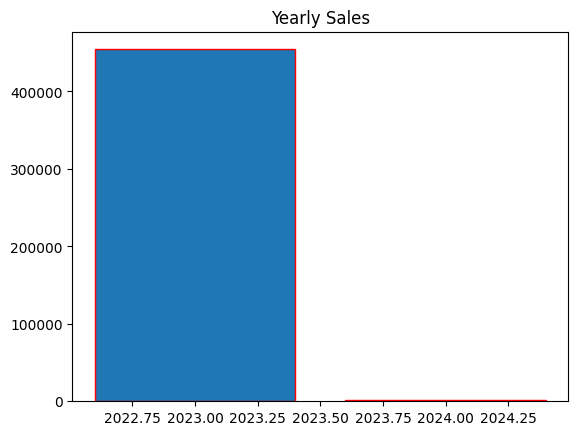

In [262]:
plt.bar(yearly_sales['year'], yearly_sales['Total Sales'], edgecolor='red')
plt.title('Yearly Sales')
plt.show()

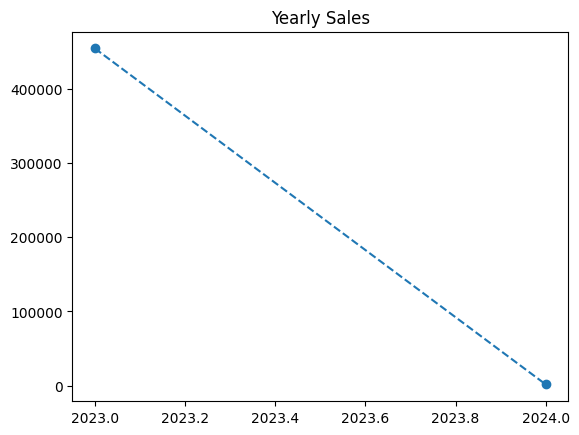

In [263]:
plt.plot(yearly_sales['year'], yearly_sales['Total Sales'], marker='o', linestyle='--')
plt.title('Yearly Sales')
plt.show()

In [268]:
year_sales = df[df['Date'].dt.year == 2023]
quartely_sales = year_sales.resample('Q', on='Date')['Total Amount'].sum().reset_index()
quartely_sales = quartely_sales.rename(columns={'Date':'Quarter','Total Amount':'Total Sales'})
quartely_sales

,Quarter,Total Sales
0,2023-03-31,108500
1,2023-06-30,123735
2,2023-09-30,96045
3,2023-12-31,126190


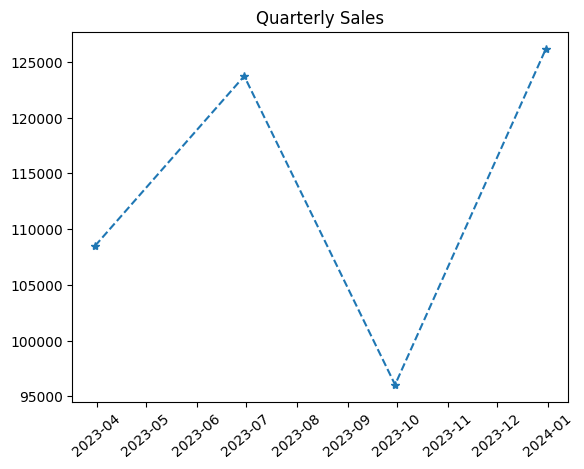

In [273]:
plt.plot(quartely_sales['Quarter'], quartely_sales['Total Sales'], marker='*', linestyle='--')
plt.title('Quarterly Sales')
plt.xticks(rotation=40)
plt.show()

In [274]:
year_sales = df[df['Date'].dt.year == 2024]
quartely_sales = year_sales.resample('Q', on='Date')['Total Amount'].sum().reset_index()
quartely_sales = quartely_sales.rename(columns={'Date':'Quarter','Total Amount':'Total Sales'})
quartely_sales

,Quarter,Total Sales
0,2024-03-31,1530


In [276]:
year_sales = df[df['Date'].dt.year == 2023]
monthly_sales = year_sales.resample('M', on='Date')['Total Amount'].sum().reset_index()
monthly_sales = monthly_sales.rename(columns={'Date':'Month','Total Amount':'Total Sales'})
monthly_sales

,Month,Total Sales
0,2023-01-31,35450
1,2023-02-28,44060
2,2023-03-31,28990
3,2023-04-30,33870
4,2023-05-31,53150
5,2023-06-30,36715
6,2023-07-31,35465
7,2023-08-31,36960
8,2023-09-30,23620
9,2023-10-31,46580


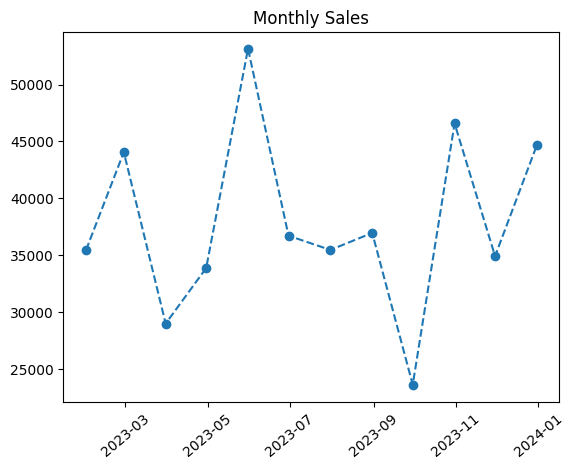

In [279]:
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker='o', linestyle='--')
plt.title('Monthly Sales')
plt.xticks(rotation=40)
plt.show()

### Customer Analysis

In [193]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
month_year,,,,,,,,,
2023-11,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2023-02,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2023-01,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
2023-05,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
2023-05,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [197]:
gender = df['Gender'].unique()
print(gender)

['Male' 'Female']


In [201]:
no_of_customers = df['Gender'].value_counts().reset_index()
no_of_customers

,Gender,count
0,Female,510
1,Male,490


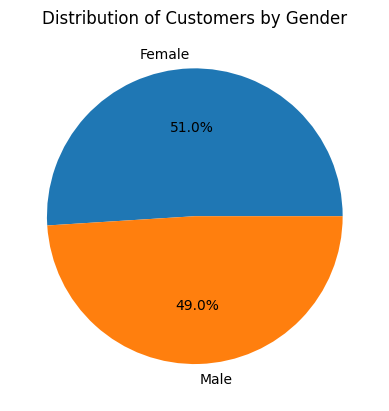

In [207]:
plt.pie(no_of_customers['count'], labels=no_of_customers['Gender'], autopct='%1.1f%%')
plt.title('Distribution of Customers by Gender')
plt.show()

In [206]:
sales_per_category = df.groupby('Gender')['Total Amount'].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={'Total Amount':'Total Sales'})
print(sales_per_category)

   Gender  Total Sales
0  Female       232840
1    Male       223160


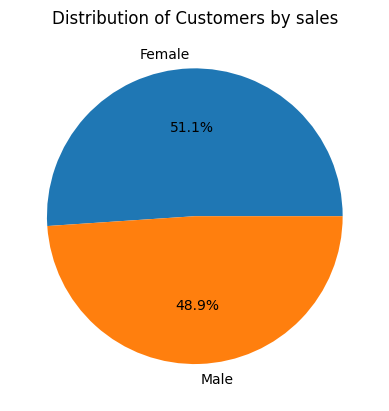

In [209]:
plt.pie(sales_per_category['Total Sales'], labels=sales_per_category['Gender'], autopct='%1.1f%%')
plt.title('Distribution of Customers by sales')
plt.show()

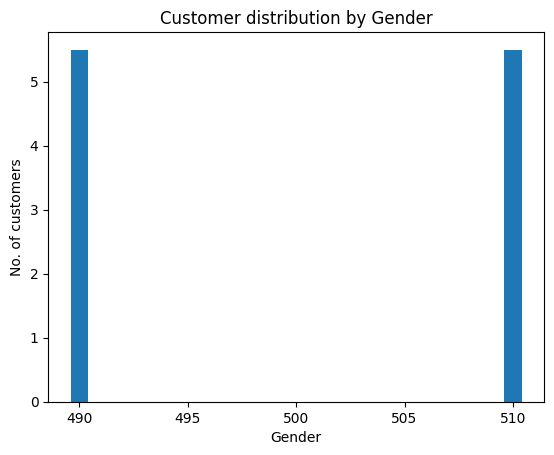

In [214]:
#Bar graph
plt.bar(no_of_customers['count'], height=5.5)
plt.xlabel('Gender')
plt.ylabel('No. of customers')
plt.title('Customer distribution by Gender')
plt.show()

In [284]:
age = df['Age'].unique()
#print(age)
count = df['Age'].value_counts().reset_index()
count.head()

,Age,count
0,43,31
1,64,31
2,57,30
3,51,30
4,34,28


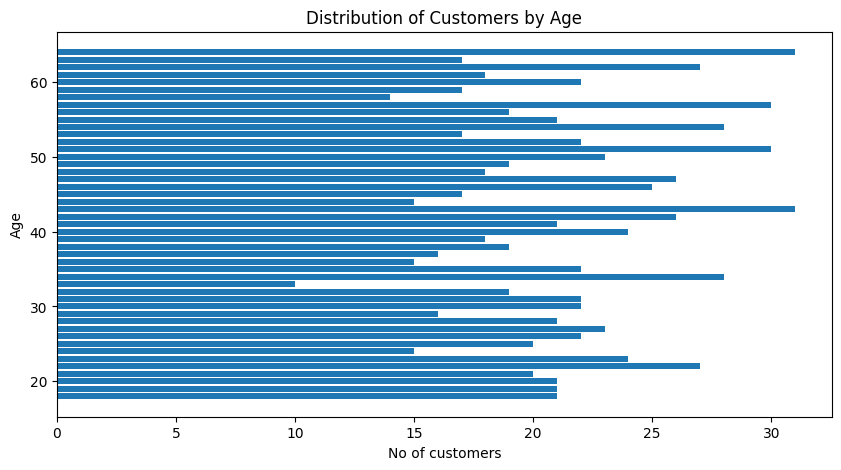

In [295]:
plt.figure(figsize=(10,5))
plt.barh(count['Age'], count['count'])
plt.title('Distribution of Customers by Age')
plt.xlabel('No of customers')
plt.ylabel('Age')
plt.show()

In [292]:
sales_per_category_age = df.groupby('Age')['Total Amount'].sum().reset_index()
sales_per_category_age = sales_per_category_age.rename(columns={'Total Amount':'Total Sales'})
print(sales_per_category_age)

    Age  Total Sales
0    18        11215
1    19        14870
2    20         8645
3    21        12585
4    22        13700
5    23         8220
6    24         5415
7    25         9900
8    26        13980
9    27         9385
10   28         8670
11   29         6570
12   30         9790
13   31        10220
14   32         5550
15   33         6240
16   34        16785
17   35        11290
18   36         9105
19   37        11650
20   38        11100
21   39         4595
22   40         9415
23   41         5650
24   42         8500
25   43        17970
26   44         7560
27   45         6325
28   46        13090
29   47        12505
30   48         7240
31   49         5110
32   50         9845
33   51        16065
34   52         7040
35   53         9510
36   54        10505
37   55         9780
38   56         9440
39   57         9290
40   58         7395
41   59         9470
42   60        11590
43   61         6730
44   62         8120
45   63         9250
46   64      

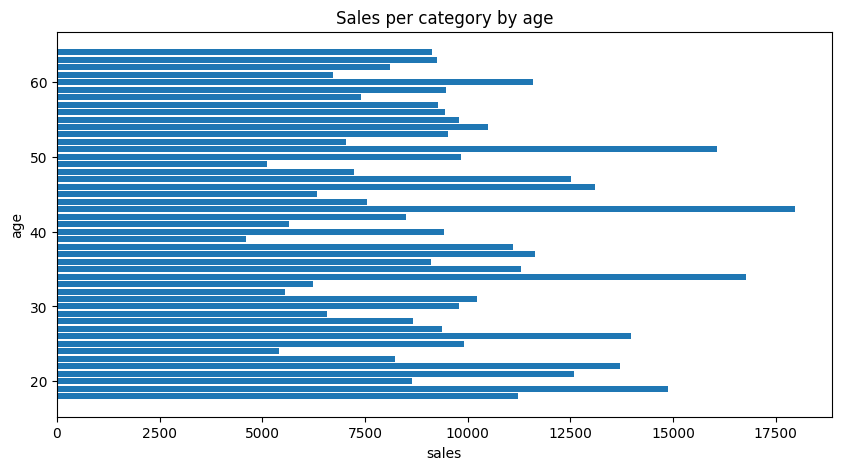

In [296]:
plt.figure(figsize=(10,5))
plt.barh(sales_per_category_age['Age'], sales_per_category_age['Total Sales'])

plt.title('Sales per category by age')
plt.xlabel('sales')
plt.ylabel('age')
plt.show()

In [219]:
customer_sales = df.groupby(['Customer ID'])['Total Amount'].sum().reset_index()

top_spenders = customer_sales.sort_values(by='Total Amount', ascending=False)

top_spenders.head(10)

,Customer ID,Total Amount
487,CUST487,2000
476,CUST476,2000
773,CUST773,2000
503,CUST503,2000
92,CUST093,2000
88,CUST089,2000
946,CUST946,2000
157,CUST157,2000
155,CUST155,2000
420,CUST420,2000


### Product Analysis

In [220]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
month_year,,,,,,,,,
2023-11,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
2023-02,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2023-01,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
2023-05,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
2023-05,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [222]:
category = df['Product Category'].unique()
print(category)

['Beauty' 'Clothing' 'Electronics']


In [227]:
category_count = df['Product Category'].value_counts().reset_index()
category_count

,Product Category,count
0,Clothing,351
1,Electronics,342
2,Beauty,307


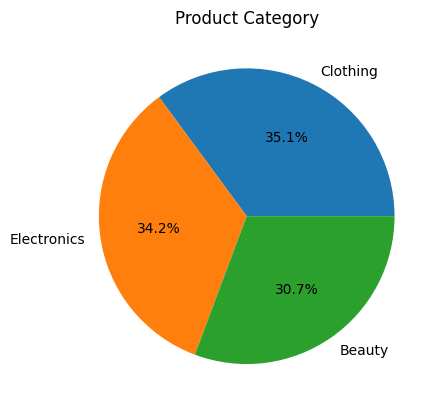

In [228]:
plt.pie(category_count['count'], labels=category_count['Product Category'], autopct='%1.1f%%')
plt.title('Product Category')
plt.show()

In [230]:
sales_per_product_category = df.groupby(['Product Category'])['Total Amount'].sum().reset_index()
sales_per_product_category

,Product Category,Total Amount
0,Beauty,143515
1,Clothing,155580
2,Electronics,156905


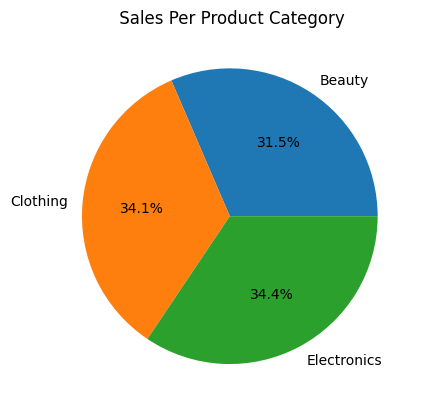

In [231]:
plt.pie(sales_per_product_category['Total Amount'], labels=sales_per_product_category['Product Category'], autopct='%1.1f%%')
plt.title(' Sales Per Product Category')
plt.show()

In [232]:
sales_per_product_category = df.groupby(['Product Category'])['Total Amount'].sum().reset_index()

top_product = sales_per_product_category.sort_values(by='Total Amount', ascending=False)

top_product.head()

,Product Category,Total Amount
2,Electronics,156905
1,Clothing,155580
0,Beauty,143515


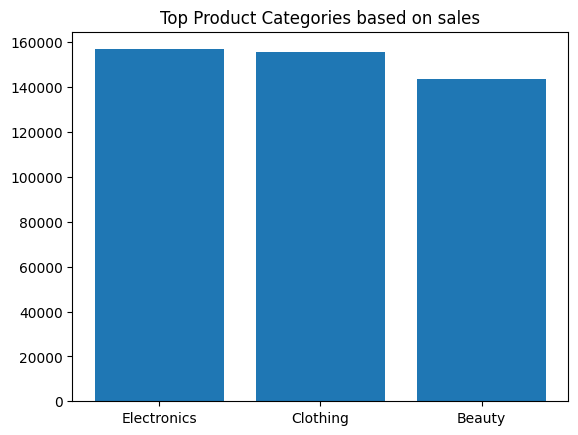

In [236]:
plt.bar(top_product['Product Category'], top_product['Total Amount'])
plt.title('Top Product Categories based on sales')
plt.show()